In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('D:/Epsilon AI/DSP/EDA10/House price - Kaggle/house_prices - Copy.csv')
df

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [3]:
df.drop(['Index','Description','Dimensions','Plot Area','facing','overlooking','Society','Car Parking','Carpet Area','Balcony','Floor'],axis=1,inplace=True)
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns = df.columns.str.replace('/','_')
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,NaN
...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,63 Lac,3225.0,zirakpur,Ready to Move,New Property,Semi-Furnished,3,Freehold,1953 sqft
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,NaN,1680 sqft
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,NaN
187529,2 BHK Ready to Occupy Flat for sale in Friends...,30 Lac,4231.0,zirakpur,Ready to Move,Resale,Semi-Furnished,2,NaN,709 sqft


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            187531 non-null  object 
 1   amountin_rupees  187531 non-null  object 
 2   price_in_rupees  169866 non-null  float64
 3   location         187531 non-null  object 
 4   status           186916 non-null  object 
 5   transaction      187448 non-null  object 
 6   furnishing       184634 non-null  object 
 7   bathroom         186703 non-null  object 
 8   ownership        122014 non-null  object 
 9   super_area       79846 non-null   object 
dtypes: float64(1), object(9)
memory usage: 14.3+ MB


In [5]:
df = df[df.isnull().any(axis=1)]
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,NaN
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,69.6 Lac,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,NaN
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,44.9 Lac,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,NaN
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,NaN,1680 sqft
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,NaN


In [6]:
df[['super_area_num', 'super_area_unit']] = df['super_area'].str.extract(r'(\d+\.?\d*)\s*(\w+)', expand=True)
df['super_area_num'] = df['super_area_num'].astype(float)
df['super_area_unit'] = df['super_area_unit'].fillna('sqft')
df['super_area_num'] = df['super_area_num'].fillna(0)
df = df.drop('super_area', axis=1)
df

C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\3363446946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['super_area_num', 'super_area_unit']] = df['super_area'].str.extract(r'(\d+\.?\d*)\s*(\w+)', expand=True)
C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\3363446946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['super_area_num', 'super_area_unit']] = df['super_area'].str.extract(r'(\d+\.?\d*)\s*(\w+)', expand=True)
C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\3363446946.py:2: Se

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_num,super_area_unit
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,NaN,0.0,sqft
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0,sqft
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0,sqft
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,NaN,0.0,sqft
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0,sqft
...,...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,69.6 Lac,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0,sqft
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,44.9 Lac,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0,sqft
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,NaN,1680.0,sqft
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0,sqft


In [7]:
df.rename(columns={'super_area_num':'super_area_sqft'}, inplace=True)
df.drop('super_area_unit', axis=1, inplace=True)
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_sqft
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,NaN,0.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,NaN,0.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,69.6 Lac,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,44.9 Lac,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,NaN,1680.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0


In [8]:
df.isnull().sum()

title                  0
amountin_rupees        0
price_in_rupees    17665
location               0
status               615
transaction           83
furnishing          2897
bathroom             828
ownership          65517
super_area_sqft        0
dtype: int64

In [9]:
df['ownership'] = df['ownership'].fillna('Unknown')
df['transaction'] = df['transaction'].fillna('Unknown')
df['furnishing'] = df['furnishing'].fillna('Unknown')
df['status'] = df['status'].fillna('Unknown')
df


,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_sqft
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,69.6 Lac,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,44.9 Lac,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,Unknown,1680.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0


In [10]:
df.isnull().sum()   

title                  0
amountin_rupees        0
price_in_rupees    17665
location               0
status                 0
transaction            0
furnishing             0
bathroom             828
ownership              0
super_area_sqft        0
dtype: int64

In [11]:
df['bathroom'] = df['bathroom'].fillna(1)
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_sqft
0,1 BHK Ready to Occupy Flat for sale in Srushti...,42 Lac,6000.0,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,98 Lac,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,1.40 Cr,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,25 Lac,NaN,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,1.60 Cr,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,69.6 Lac,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,44.9 Lac,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,55 Lac,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,Unknown,1680.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,76 Lac,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0


In [12]:
df.isnull().sum()

title                  0
amountin_rupees        0
price_in_rupees    17665
location               0
status                 0
transaction            0
furnishing             0
bathroom               0
ownership              0
super_area_sqft        0
dtype: int64

In [13]:
import numpy as np

def clean_price(price):
    if isinstance(price, str):
        price = price.strip()
    if 'Lac' in price:
        price = price.replace('Lac','').strip()
        price = float(price) * 100000
    elif 'Cr' in price:
        price = price.replace('Cr','').strip()
        price = float(price) * 10000000
    elif 'Call for Price' in price or not price:
        return np.nan
    else:
        price = float(price)
    return price

df['amountin_rupees']=df['amountin_rupees'].apply(clean_price)
df['amountin_rupees']=df['amountin_rupees'].astype(float)
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_sqft
0,1 BHK Ready to Occupy Flat for sale in Srushti...,4200000.0,6000.0,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,9800000.0,13799.0,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,14000000.0,17500.0,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,2500000.0,NaN,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,16000000.0,18824.0,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,6960000.0,5135.0,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,4490000.0,3904.0,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,5500000.0,3274.0,zirakpur,Ready to Move,Resale,Unfurnished,3,Unknown,1680.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,7600000.0,4343.0,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0


In [14]:
df['amountin_rupees'] = df['amountin_rupees'].fillna(df['amountin_rupees'].mean())
df['price_in_rupees'] = df['price_in_rupees'].fillna(df['price_in_rupees'].mean())
df

,title,amountin_rupees,price_in_rupees,location,status,transaction,furnishing,bathroom,ownership,super_area_sqft
0,1 BHK Ready to Occupy Flat for sale in Srushti...,4200000.0,6000.000000,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,9800000.0,13799.000000,thane,Ready to Move,Resale,Semi-Furnished,2,Freehold,0.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,14000000.0,17500.000000,thane,Ready to Move,Resale,Unfurnished,2,Freehold,0.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,2500000.0,7571.951803,thane,Ready to Move,Resale,Unfurnished,1,Unknown,0.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,16000000.0,18824.000000,thane,Ready to Move,Resale,Unfurnished,2,Co-operative Society,0.0
...,...,...,...,...,...,...,...,...,...,...
187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,6960000.0,5135.000000,zirakpur,Ready to Move,Resale,Semi-Furnished,3,Freehold,0.0
187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,4490000.0,3904.000000,zirakpur,Ready to Move,New Property,Unfurnished,3,Freehold,0.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,5500000.0,3274.000000,zirakpur,Ready to Move,Resale,Unfurnished,3,Unknown,1680.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,7600000.0,4343.000000,zirakpur,Ready to Move,Resale,Furnished,3,Freehold,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155600 entries, 0 to 187529
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            155600 non-null  object 
 1   amountin_rupees  155600 non-null  float64
 2   price_in_rupees  155600 non-null  float64
 3   location         155600 non-null  object 
 4   status           155600 non-null  object 
 5   transaction      155600 non-null  object 
 6   furnishing       155600 non-null  object 
 7   bathroom         155600 non-null  object 
 8   ownership        155600 non-null  object 
 9   super_area_sqft  155600 non-null  float64
dtypes: float64(3), object(7)
memory usage: 13.1+ MB


### Q1 - What is the top 10 locations with the highest number of houses that are ready to move?

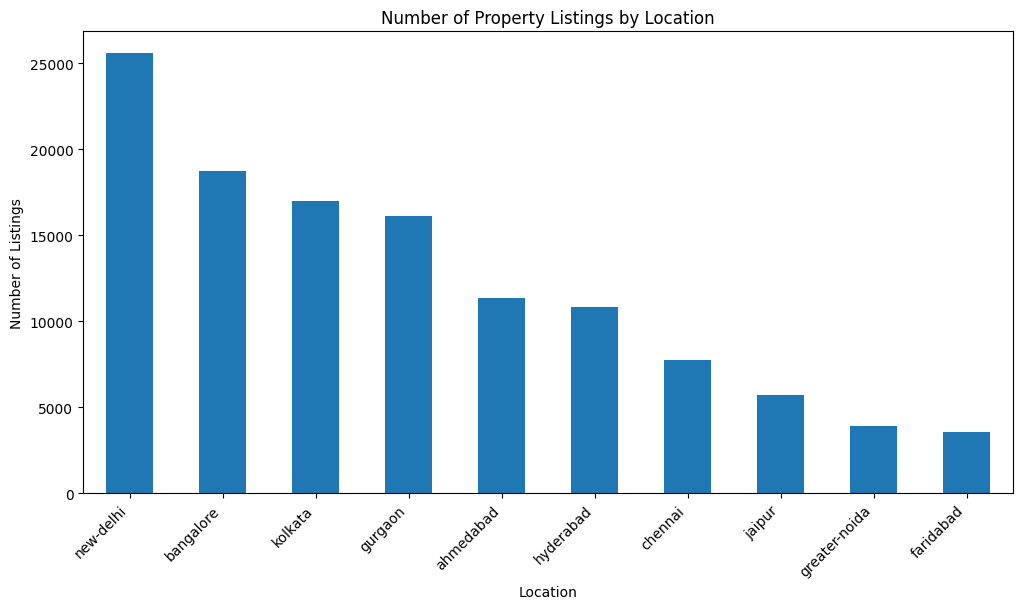

In [16]:
ready_to_move = df['status'].value_counts().head(10)
count_of_location = df['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
count_of_location.plot(kind='bar')
plt.title('Number of Property Listings by Location')
plt.xlabel('Location')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.show()


['Ready to Move' 'Unknown']


<module 'matplotlib.pyplot' from 'c:\\Users\\sony0\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

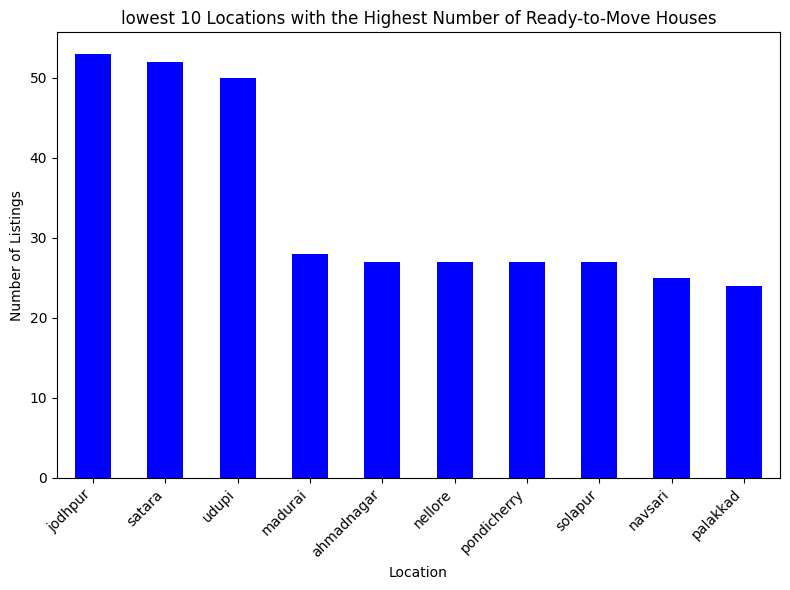

In [17]:
print(df['status'].unique())
ready_to_move_df = df[df['status'] == 'Ready to Move']
location_counts = ready_to_move_df['location'].value_counts().tail(10)
plt.figure(figsize=(8, 6))
location_counts.plot(kind='bar', color='blue')
plt.title('lowest 10 Locations with the Highest Number of Ready-to-Move Houses')
plt.xlabel('Location')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155600 entries, 0 to 187529
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            155600 non-null  object 
 1   amountin_rupees  155600 non-null  float64
 2   price_in_rupees  155600 non-null  float64
 3   location         155600 non-null  object 
 4   status           155600 non-null  object 
 5   transaction      155600 non-null  object 
 6   furnishing       155600 non-null  object 
 7   bathroom         155600 non-null  object 
 8   ownership        155600 non-null  object 
 9   super_area_sqft  155600 non-null  float64
dtypes: float64(3), object(7)
memory usage: 13.1+ MB


### Q2 - What is the average price per square foot for properties across different locations?​

C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\230834537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_in_rupees', y='location', data=average_price_per_sqft, palette='viridis')


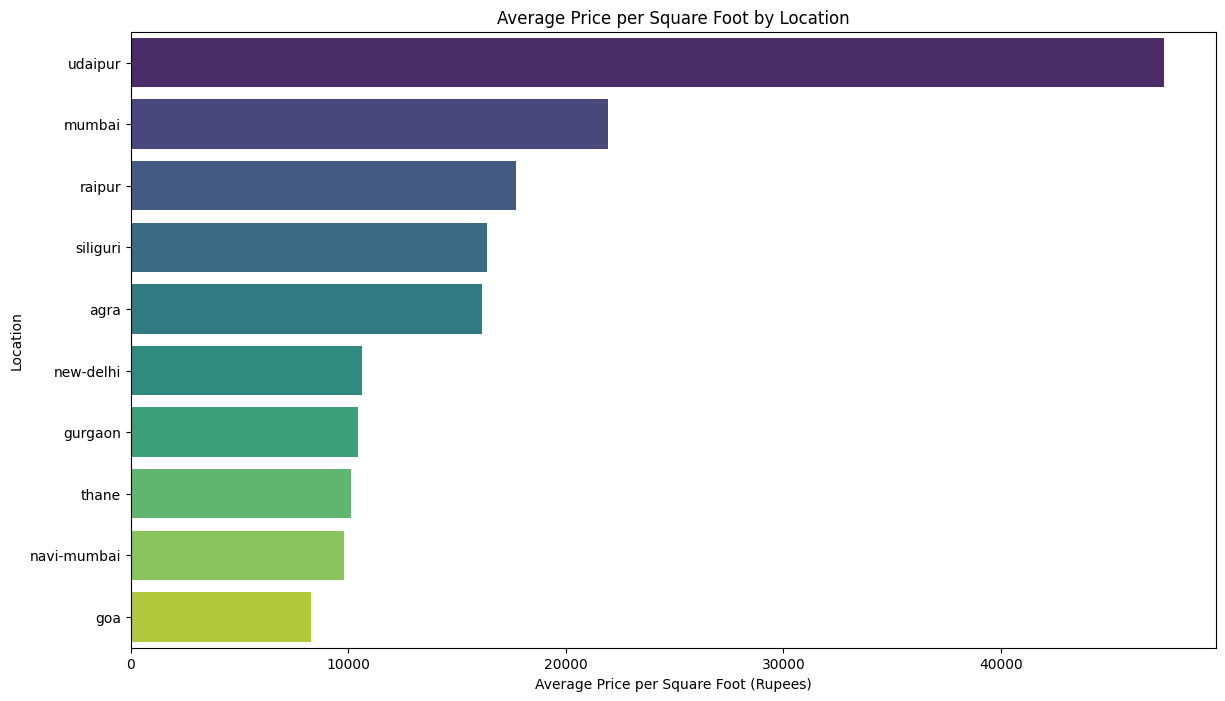

In [19]:

average_price_per_sqft = df.groupby('location')['price_in_rupees'].mean().reset_index().sort_values(by='price_in_rupees', ascending=False).head(10)
average_price_per_sqft = average_price_per_sqft.sort_values(by='price_in_rupees', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='price_in_rupees', y='location', data=average_price_per_sqft, palette='viridis')
plt.xlabel('Average Price per Square Foot (Rupees)')
plt.ylabel('Location')
plt.title('Average Price per Square Foot by Location')
plt.show()


### Q3 - Price comparison by furnishing type?​

### Q3 - What is the corelationship between price and super area?​

C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\947962873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='furnishing', y='amountin_rupees', data=average_price_by_furnishing, palette='viridis')


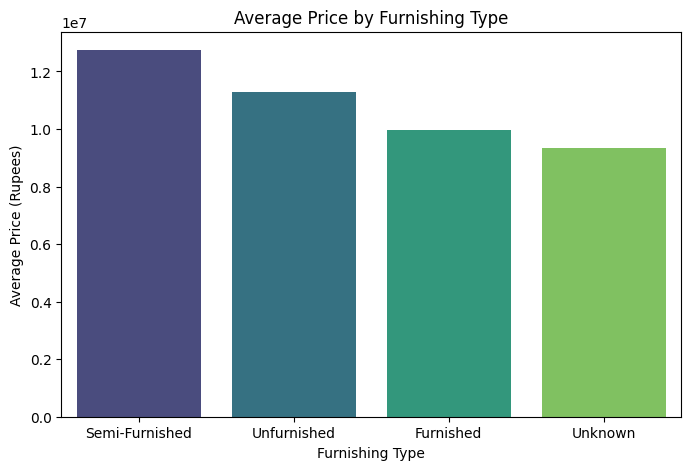

In [21]:
average_price_by_furnishing = df.groupby('furnishing')['amountin_rupees'].mean().reset_index().sort_values(by='amountin_rupees', ascending=False)

# Plot the average price for each furnishing type
plt.figure(figsize=(8, 5))
sns.barplot(x='furnishing', y='amountin_rupees', data=average_price_by_furnishing, palette='viridis')
plt.xlabel('Furnishing Type')
plt.ylabel('Average Price (Rupees)')
plt.title('Average Price by Furnishing Type')
plt.show()

### Q4 ownership types vs price range in ascending order?​

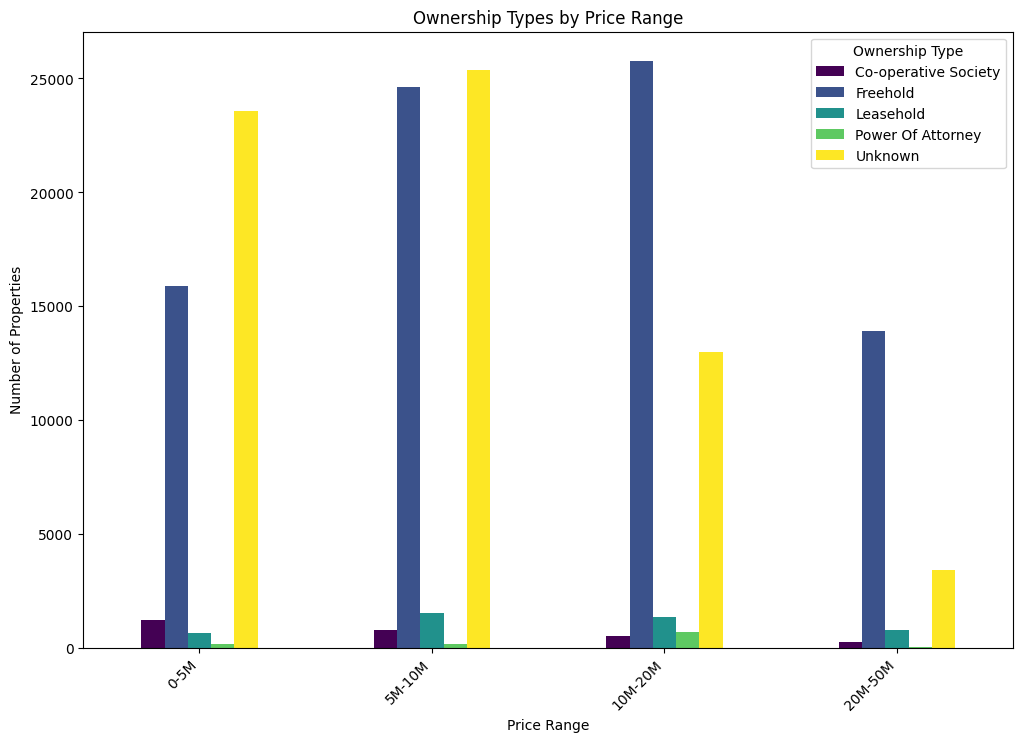

In [24]:
price_bins = [0, 5000000, 10000000, 20000000, 50000000]
price_labels = ['0-5M', '5M-10M', '10M-20M', '20M-50M']
df['price_range'] = pd.cut(df['amountin_rupees'], bins=price_bins, labels=price_labels)
ownership_by_price_range = df.groupby('price_range', observed=True)['ownership'].value_counts().unstack().fillna(0)
ownership_by_price_range = ownership_by_price_range.sort_index(ascending=True)
ownership_by_price_range.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.title('Ownership Types by Price Range')
plt.legend(title='Ownership Type')
pticks = plt.xticks(rotation=45, ha='right')
plt.show()


### Q5 What is the heights city that have most number of transactions?​

C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\1607371741.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Transactions', y='Location', data=transactions_per_city, palette='viridis')


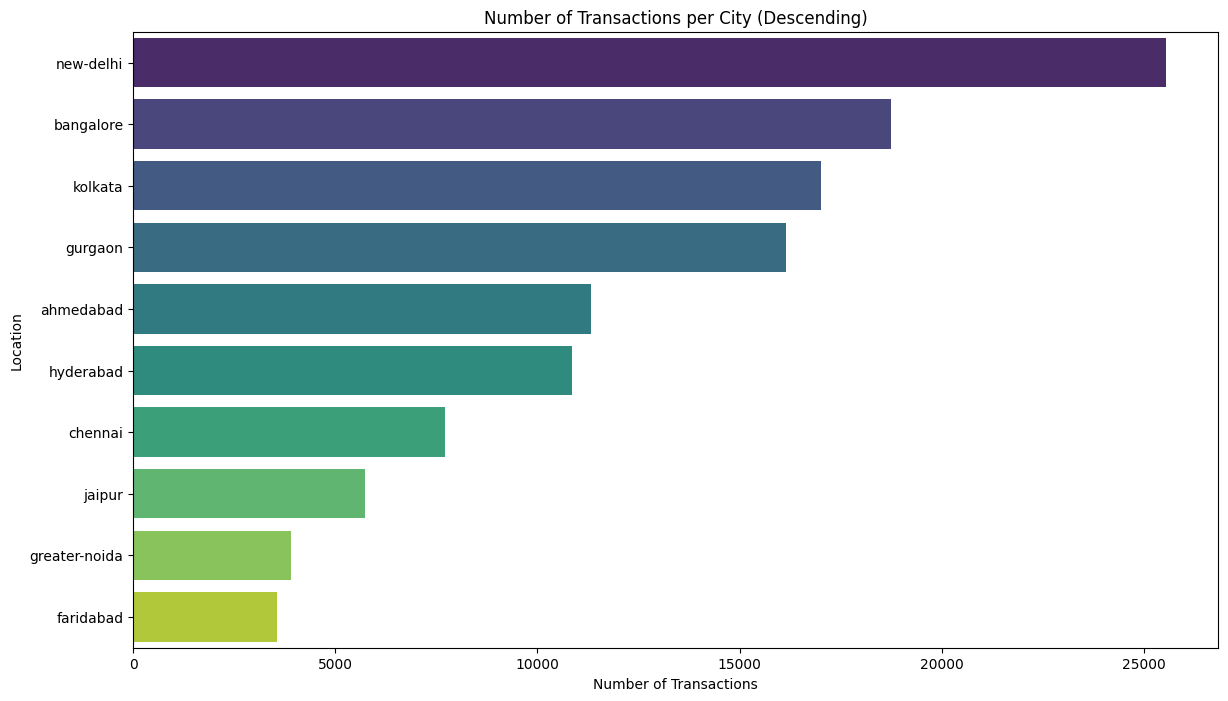

In [ ]:
transactions_per_city = df['location'].value_counts().reset_index().head(10)
transactions_per_city.columns = ['Location', 'Number of Transactions']
transactions_per_city = transactions_per_city.sort_values(by='Number of Transactions', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Transactions', y='Location', data=transactions_per_city, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.title('Number of Transactions per City (Descending)')
plt.show()


### Q6 - What is the corelationship between price and super area?​

C:\Users\sony0\AppData\Local\Temp\ipykernel_5424\879614677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_in_rupees', y='status', data=average_price_by_status, palette='viridis')


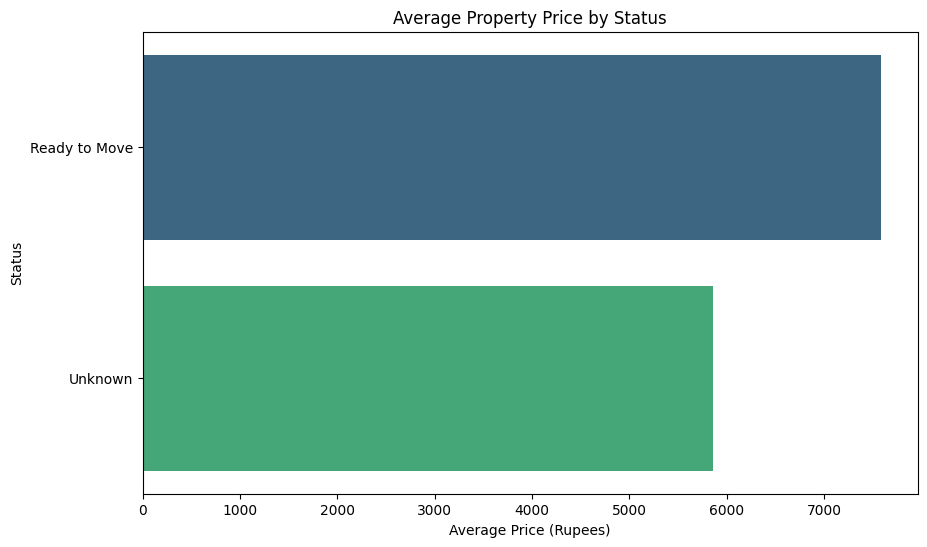

In [82]:
average_price_by_status = df.groupby('status')['price_in_rupees'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='price_in_rupees', y='status', data=average_price_by_status, palette='viridis')
plt.xlabel('Average Price (Rupees)')
plt.ylabel('Status')
plt.title('Average Property Price by Status')
plt.show()
